# Disease Prediction EDA Notebook 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style="whitegrid")

# Paths and loading
dataset_path = '../dataset/dataset.csv'
symptom_description_path = '../dataset/symptom_Description.csv'
symptom_severity_path = '../dataset/Symptom-severity.csv'
symptom_precaution_path = '../dataset/symptom_precaution.csv'

dataset_df = pd.read_csv(dataset_path)
symptom_severity_df = pd.read_csv(symptom_severity_path)
symptom_description_df = pd.read_csv(symptom_description_path)
precaution_df = pd.read_csv(symptom_precaution_path)


# 1. Basic info and shapes

In [2]:
print(f"Main dataset shape: {dataset_df.shape}")
print(f"Symptom Severity shape: {symptom_severity_df.shape}")
print(f"Symptom Description shape: {symptom_description_df.shape}")
print(f"Symptom Precaution shape: {precaution_df.shape}")

Main dataset shape: (4920, 18)
Symptom Severity shape: (133, 2)
Symptom Description shape: (41, 2)
Symptom Precaution shape: (41, 5)


# 2. Missing values summary - simpler text + bar plot of % missing per symptom column

In [3]:
missing_perc = dataset_df.isnull().mean() * 100
missing_perc = missing_perc.drop('Disease')  # Disease column assumed no missingness

In [4]:
print("\nPercentage of Missing Values Per Symptom Column:")
print(missing_perc)


Percentage of Missing Values Per Symptom Column:
Symptom_1      0.000000
Symptom_2      0.000000
Symptom_3      0.000000
Symptom_4      7.073171
Symptom_5     24.512195
Symptom_6     40.365854
Symptom_7     53.902439
Symptom_8     60.487805
Symptom_9     65.609756
Symptom_10    69.268293
Symptom_11    75.731707
Symptom_12    84.878049
Symptom_13    89.756098
Symptom_14    93.780488
Symptom_15    95.121951
Symptom_16    96.097561
Symptom_17    98.536585
dtype: float64


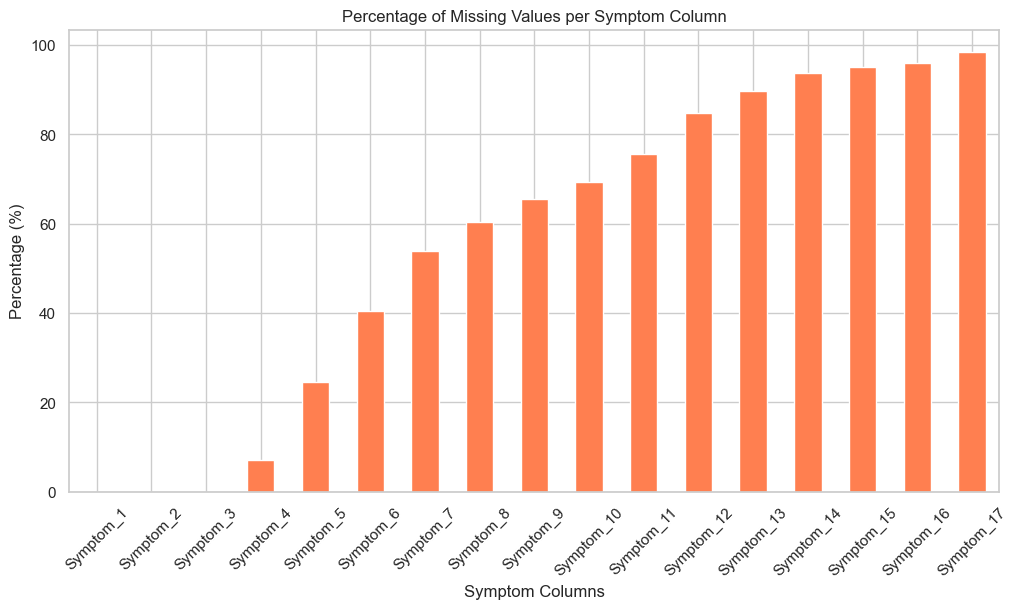

In [5]:
missing_perc.plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values per Symptom Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Symptom Columns')
plt.xticks(rotation=45)
plt.show()

# 3. Class distribution


Number of samples per disease (top 10):
Disease
Fungal infection       120
Allergy                120
GERD                   120
Chronic cholestasis    120
Drug Reaction          120
Peptic ulcer diseae    120
AIDS                   120
Diabetes               120
Gastroenteritis        120
Bronchial Asthma       120
Name: count, dtype: int64


C:\Users\Arun Kumar\AppData\Local\Temp\ipykernel_22308\1062336663.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=disease_counts.index[:10], x=disease_counts.values[:10], palette='viridis')


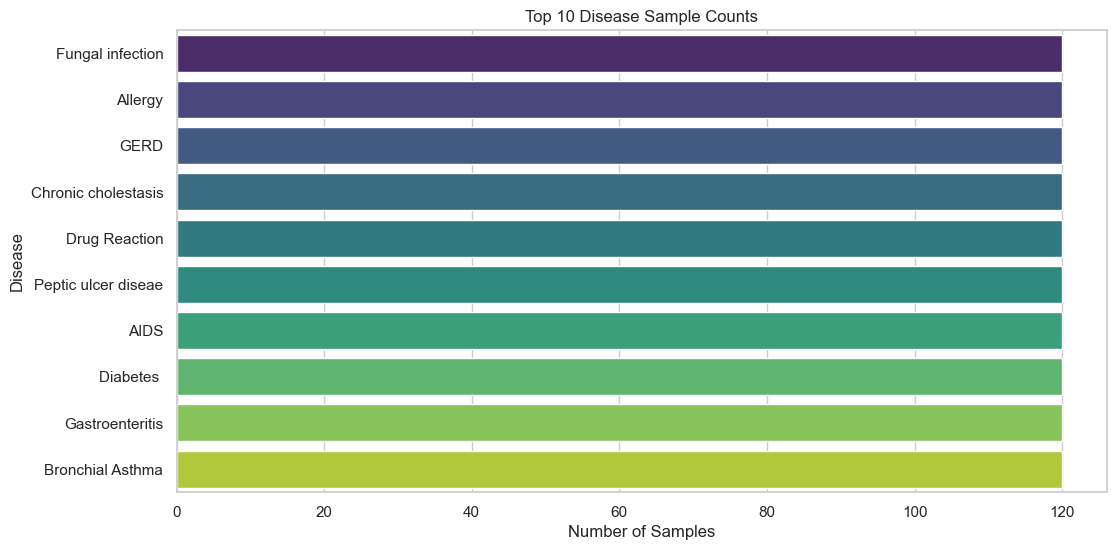

In [6]:
disease_counts = dataset_df['Disease'].value_counts()

print("\nNumber of samples per disease (top 10):")
print(disease_counts.head(10))

sns.barplot(y=disease_counts.index[:10], x=disease_counts.values[:10], palette='viridis')
plt.title('Top 10 Disease Sample Counts')
plt.xlabel('Number of Samples')
plt.ylabel('Disease')
plt.show()

# 4. Unique symptom counts by column (to show diversity of symptoms)

In [7]:
symptom_cols = [col for col in dataset_df.columns if col.startswith('Symptom_')]
unique_counts = dataset_df[symptom_cols].nunique()

print("\nNumber of unique symptom labels per symptom column:")
print(unique_counts)


Number of unique symptom labels per symptom column:
Symptom_1     34
Symptom_2     48
Symptom_3     54
Symptom_4     50
Symptom_5     38
Symptom_6     32
Symptom_7     26
Symptom_8     21
Symptom_9     22
Symptom_10    21
Symptom_11    18
Symptom_12    11
Symptom_13     8
Symptom_14     4
Symptom_15     3
Symptom_16     3
Symptom_17     1
dtype: int64


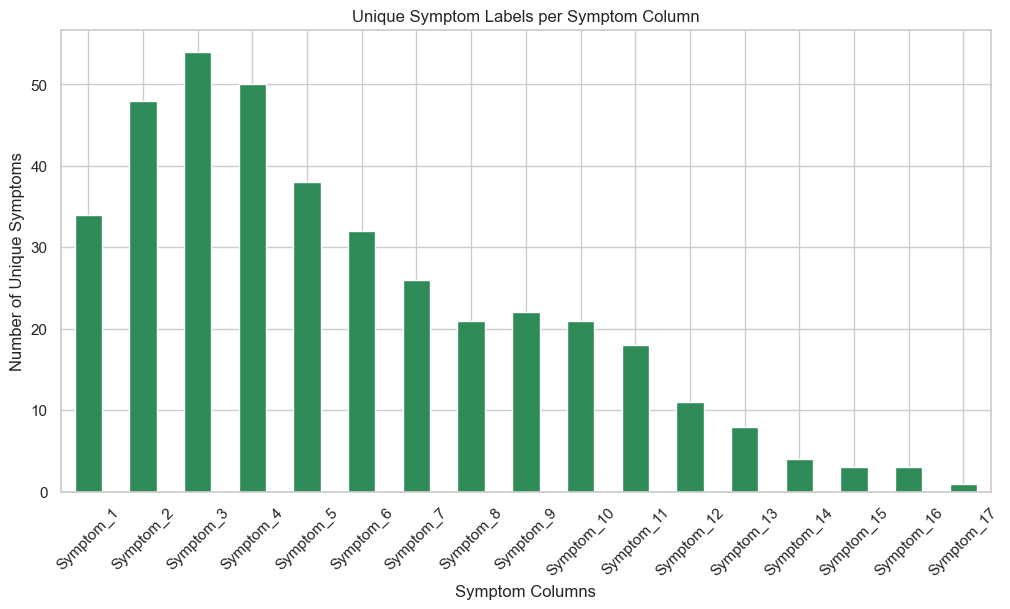

In [8]:
unique_counts.plot(kind='bar', color='seagreen')
plt.title('Unique Symptom Labels per Symptom Column')
plt.ylabel('Number of Unique Symptoms')
plt.xlabel('Symptom Columns')
plt.xticks(rotation=45)
plt.show()

# 5. Example: Show some symptom severity data distribution

In [9]:
print("\nSymptom Severity Sample:")
print(symptom_severity_df.head())


Symptom Severity Sample:
                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


# Check exact counts of severity values

In [10]:

print(symptom_severity_df['weight'].value_counts().sort_index())

weight
1     1
2    15
3    21
4    39
5    35
6    17
7     5
Name: count, dtype: int64


# Create histogram with bins from 0 to 8 (to cover 0-7 inclusive)

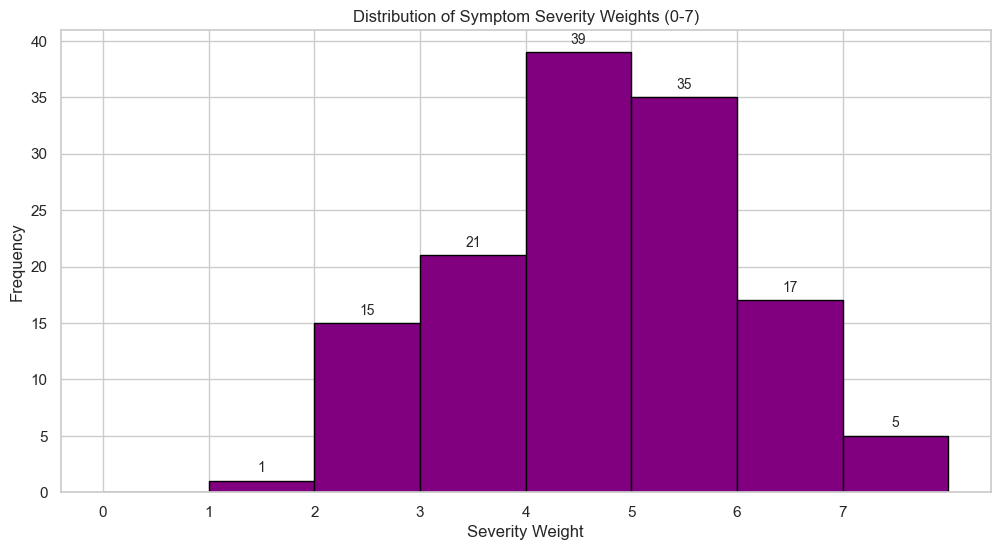

In [11]:
import matplotlib.pyplot as plt

weights = symptom_severity_df['weight']


bins = range(0, 9)
counts, bins_, patches = plt.hist(weights, bins=bins, edgecolor='black', color='purple')

plt.title('Distribution of Symptom Severity Weights (0-7)')
plt.xlabel('Severity Weight')
plt.ylabel('Frequency')
plt.xticks(range(0, 8))  # Show ticks for each integer severity weight

# Add counts on top of bars
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count + 0.5,  # position above the bar
                 int(count), ha='center', va='bottom', fontsize=10)

plt.show()